In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Transforming data to a json
record oriented

In [37]:
df = pd.read_csv("/Users/finn/Documents/GitHub/data/e4e3/Uncleaned Data/Chicago_Employees.csv")

In [38]:
df['Income'] = df['Typical Hours']*df['Hourly Rate']
df.loc[df['Salary or Hourly'] == 'SALARY', 'Income'] = df['Annual Salary']

In [39]:
df = df[['Name', 'Job Titles', 'Department', 'Income', 'Salary or Hourly']]
u_df = df.copy()

In [40]:
df = df.groupby(by=['Department', 'Job Titles']).sum().reset_index()

In [41]:
df['Department'] = df['Department'].str.title()
df['Job Titles'] = df['Job Titles'].str.title()

In [42]:
df.Department.value_counts()

Dept Of Water Management                      158
Chicago Dept Of Transportation                156
Department Of Aviation                        152
Dais                                          144
Department Of Public Health                   126
Department Of Police                           95
Family And Support Services                    89
Department Of Finance                          83
Fire Department                                81
Chicago Public Library                         75
Public Safety Administration                   72
Dept Streets And Sanitation                    64
Department Of Planning And Development         54
Bus Affairs And Consumer Prot                  51
Dept Of Buildings                              44
Department Of Law                              41
City Clerk                                     40
Office Of Emergency Management                 39
Department Of Human Resources                  35
Ig                                             34


In [43]:

df.columns = ['Department', 'Role', 'value']

In [44]:
df.sort_values(by='value', ascending=False)

,Department,Role,value
1021,Department Of Police,Police Officer,815482254.00000
1045,Department Of Police,Sergeant,162041958.00000
1682,Fire Department,Firefighter-Emt,146757402.00000
1026,Department Of Police,Police Officer (Assigned As Detective),131109012.00000
1683,Fire Department,Firefighter-Emt (Recruit),52332408.00000
...,...,...,...
1401,Dept Of Water Management,Foreman Of Custodial Workers,784.00000
50,Bus Affairs And Consumer Prot,Law Clerk,648.00000
288,Chicago Public Library,Librarian I - Hourly,614.00000
1788,Office Of Budget & Management,Student Intern,539.00000


rebinding a few key departments for legibility:

In [45]:
df.groupby(by=['Department']).sum().reset_index().sort_values(by='value', ascending=False)
rebinds = {
    "Department Of Police"
}

In [46]:
df.to_json('chicago_jobs.json',orient='records')

In [47]:
df

,Department,Role,value
0,Board Of Election Commissioner,A/Suprv Redistricting,58524.00000
1,Board Of Election Commissioner,Admin Asst To The Commissioners,78708.00000
2,Board Of Election Commissioner,Asst Executive Dir - Bd Of Elections,136872.00000
3,Board Of Election Commissioner,Asst Manager - Bd Of Elections,444792.00000
4,Board Of Election Commissioner,Asst To The Dir,74988.00000
...,...,...,...
1933,Public Safety Administration,Senior Telecommunications Specialist,112716.00000
1934,Public Safety Administration,Staff Asst,305556.00000
1935,Public Safety Administration,Stores Laborer,3672.00000
1936,Public Safety Administration,Supervising Investigator,159444.00000


### Wage Distributions

In [56]:
df = pd.read_csv("/Users/finn/Documents/GitHub/data/e4e3/Uncleaned Data/Chicago_Employees.csv")

In [60]:
df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"CABALLERO, SAMUEL A",FOREMAN OF MOTOR TRUCK DRIVERS,DEPT STREETS AND SANITATION,F,HOURLY,40.00000,NaN,41.41000
1,"MITCHELL, MARY",TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT,F,SALARY,NaN,42312.00000,NaN
2,"MUNOZ, LISSETTE C",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,97974.00000,NaN
3,"ALDERDEN, JACOB M",CAPTAIN,DEPARTMENT OF POLICE,F,SALARY,NaN,159552.00000,NaN
4,"JOHNSON, ANTHONY L",MOTOR TRUCK DRIVER,DEPT OF WATER MANAGEMENT,F,HOURLY,40.00000,NaN,39.25000
...,...,...,...,...,...,...,...,...
31200,"LADUZINSKY, MARK J",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,111966.00000,NaN
31201,"MARCIANO, DAVID",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,97974.00000,NaN
31202,"CHORZEPA, PETER J",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,97974.00000,NaN
31203,"SEPCOT, SEAN W",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,104934.00000,NaN


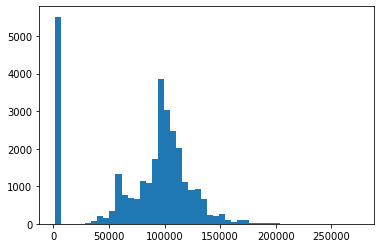

In [59]:
# Create a histogram from the 'values' column
plt.hist(ungrouped_df[ungrouped_df['Income'] > 1000]['Income'], bins=50, )

# Show the plot
plt.show()

In [35]:
ungrouped_df.sort_values(by="value", ascending=False)


,Department,Role,value
1021,Department Of Police,Police Officer,815482254.00000
1045,Department Of Police,Sergeant,162041958.00000
1682,Fire Department,Firefighter-Emt,146757402.00000
1026,Department Of Police,Police Officer (Assigned As Detective),131109012.00000
1683,Fire Department,Firefighter-Emt (Recruit),52332408.00000
...,...,...,...
1401,Dept Of Water Management,Foreman Of Custodial Workers,784.00000
50,Bus Affairs And Consumer Prot,Law Clerk,648.00000
288,Chicago Public Library,Librarian I - Hourly,614.00000
1788,Office Of Budget & Management,Student Intern,539.00000


In [34]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

ungrouped_df.value.describe()

count        1938.00000
mean      1252173.15043
std      19577590.86749
min           393.60000
25%         90444.00000
50%        135343.20000
75%        321966.00000
max     815482254.00000
Name: value, dtype: float64